<a href="https://colab.research.google.com/github/rayxtn/amazon_review_classification/blob/main/amazon_review_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import nltk
from nltk import corpus, tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer , PorterStemmer , porter
import re
import sklearn
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from google.colab import drive
drive.mount('/content/drive')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sen_analayzer = SentimentIntensityAnalyzer()

In [6]:
test_text =  "this is a nice !"
sen_analayzer.polarity_scores(test_text)

{'neg': 0.0, 'neu': 0.393, 'pos': 0.607, 'compound': 0.4753}

In [7]:
test_text2 = "this is too bad ! "
sen_analayzer.polarity_scores(test_text2)

{'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5848}

In [8]:
amazon_review = pd.read_csv('/content/drive/MyDrive/csv/Amazon_reviews.csv')

# Select the first less than 10% of the rows
product = amazon_review.head(int(0.01 * len(amazon_review)))
# Display the first few rows of the subset
product.head()
# Check the shape of the subset
product.shape

(5684, 10)

In [9]:
print("Original DataFrame:")
product.head()
product.shape
# cleaning data since there is some errors of missing values and non numerical values in scores

Original DataFrame:


(5684, 10)

In [10]:
# Drop columns with any missing values
df_cleaned = product.dropna(axis=1, how='any')
# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()
# Convert non-numeric values in 'Score' to NaN and then fill missing values with the mean
df_cleaned['Score'] = pd.to_numeric(df_cleaned['Score'], errors='coerce')  # Convert to numeric, invalid parsing becomes NaN
df_cleaned['Score'] = df_cleaned['Score'].fillna(df_cleaned['Score'].mean())  # Fill NaN values with the mean
print("\nDataFrame after cleaning (removed columns with missing data):")
df_cleaned.head()
df_cleaned.shape


DataFrame after cleaning (removed columns with missing data):


(5684, 10)

In [11]:
# due to this anything less than 3 would be a negative review , just for testing and comparing
df_cleaned['Score'].value_counts().to_frame().T

Score,5,4,1,3,2
count,3602,790,531,440,321


In [12]:
#applying the nltk sentiment analsis to the first review test
sen_analayzer.polarity_scores(df_cleaned.loc[0]['Summary'])

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

Result compoud seems > than 0 it means positive
going to check the score and compare :

In [13]:
print(df_cleaned.loc[0]['Score'])

5


Result of score included says 5 means it is correct

In [14]:
df_cleaned.isnull().sum().to_frame().T

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,0,0,0,0,0,0,0,0,0


In [54]:
df_cleaned['scores_analysis'] = df_cleaned['Score'].apply(lambda x: 'positive' if x > 3 else 'negative')
df_cleaned.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,scores_analysis,mysentiment_scores,compound,compound_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,positive


In [55]:
df_cleaned.shape

(5684, 14)

# **Creating a new variable in the data frame to check the text analysis and the results**

In [56]:
df_cleaned['mysentiment_scores'] = df_cleaned['Summary'].apply(lambda x: sen_analayzer.polarity_scores(x))
df_cleaned.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,scores_analysis,mysentiment_scores,compound,compound_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,positive


In [57]:
len(df_cleaned['mysentiment_scores'])

5684

In [58]:
df_cleaned['compound'] = df_cleaned['mysentiment_scores'].apply(lambda x: x['compound'])
df_cleaned.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,scores_analysis,mysentiment_scores,compound,compound_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,positive


In [59]:
df_cleaned['compound_score'] = df_cleaned['compound'].apply(lambda x: 'positive' if x > 0 else 'negative')
df_cleaned.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,scores_analysis,mysentiment_scores,compound,compound_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,positive


In [61]:
df_cleaned['scores_analysis'].value_counts()

,count
scores_analysis,
positive,4392
negative,1292


# **Evaluation or confusion Matrix**

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(df_cleaned['scores_analysis'],df_cleaned['compound_score']))
print(classification_report(df_cleaned['scores_analysis'],df_cleaned['compound_score']))
print(accuracy_score(df_cleaned['scores_analysis'],df_cleaned['compound_score']))

[[ 977  315]
 [1285 3107]]
              precision    recall  f1-score   support

    negative       0.43      0.76      0.55      1292
    positive       0.91      0.71      0.80      4392

    accuracy                           0.72      5684
   macro avg       0.67      0.73      0.67      5684
weighted avg       0.80      0.72      0.74      5684

0.7185080928923293


# Just Creating some balance for better **results**

In [64]:
from sklearn.utils import resample
import pandas as pd

# Assuming your data is loaded into a DataFrame
# Replace 'Sentiment' with your column name for scores
# Replace 'positive' and 'negative' with the actual labels in your data
positive_reviews = df_cleaned[df_cleaned['scores_analysis'] == 'positive']
negative_reviews = df_cleaned[df_cleaned['scores_analysis'] == 'negative']

# Undersample the positive reviews
positive_downsampled = resample(
    positive_reviews,
    replace=False,  # Do not duplicate samples
    n_samples=len(negative_reviews),  # Match the number of negative reviews
    random_state=42
)

# Combine the downsampled positive and all negative reviews
balanced_reviews_undersample = pd.concat([positive_downsampled, negative_reviews])

# Shuffle the dataset
balanced_reviews_undersample = balanced_reviews_undersample.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new distribution
print(balanced_reviews_undersample['scores_analysis'].value_counts())


scores_analysis
negative    1292
positive    1292
Name: count, dtype: int64


balance created for positive and negative reviews

Confusion Matrix:
 [[ 3526   727]
 [ 7988 16181]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.31      0.83      0.45      4253
    positive       0.96      0.67      0.79     24169

    accuracy                           0.69     28422
   macro avg       0.63      0.75      0.62     28422
weighted avg       0.86      0.69      0.74     28422

Accuracy: 0.6933713320667089


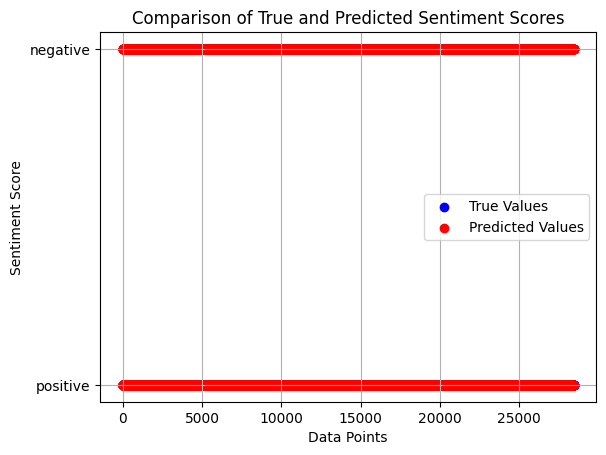

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

y_true = df_cleaned['scores_analysis']
y_pred = df_cleaned['compound_score']

# Calculate metrics
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Generate x-axis values (e.g., index of data points)
x = range(len(y_true))

# Create the scatter plot
plt.scatter(x, y_true, label='True Values', color='blue')
plt.scatter(x, y_pred, label='Predicted Values', color='red')
plt.xlabel('Data Points')
plt.ylabel('Sentiment Score')
plt.title('Comparison of True and Predicted Sentiment Scores')
plt.legend()
plt.grid(True)
plt.show()

# Building a machine learning approche

# **Preprocessing **

In [22]:
df_cleaned.shape
df_cleaned.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,scores_analysis,mysentiment_scores,compound,compound_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,positive


In [24]:
df_cleaned.shape

(5684, 14)

In [26]:
from tqdm import tqdm

preprocessed_reviews = []
for review in tqdm(df_cleaned['Summary']):
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    preprocessed_reviews.append(review)
#


100%|██████████| 5684/5684 [00:04<00:00, 1309.42it/s]


# Testing the difference after processing the **column**

In [27]:
print(df_cleaned['Text'][0])

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [20]:
print(preprocessed_reviews[0])

bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better


# ***Feature Extraction***

*Using TF-IDF*

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_reviews).toarray()
pd.DataFrame(X).shape


(5684, 3216)

In [29]:
df_cleaned['scores_analysis'] = df_cleaned['scores_analysis'].astype('category')
df_cleaned['scores_analysis'] = df_cleaned['scores_analysis'].cat.codes

In [30]:
df_cleaned['scores_analysis'].value_counts()

,count
scores_analysis,
1,4832
0,852


# **Split the data into train and test now**

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_cleaned['scores_analysis'], test_size=0.25, random_state=1)

random forest classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [38]:
print(accuracy_score(y_train, y_pred_train))
print('****************************************')
print(accuracy_score(y_test, y_pred_test))

0.9870982875908985
****************************************
0.9809992962702322


Using cross validation method for test

In [41]:
from sklearn.model_selection import cross_val_score
import numpy as np

test_accuracy = cross_val_score(rf, X_train, y_train, cv=5)
mean_accuracy = np.mean(test_accuracy)
print("Mean Cross-Validation Accuracy:", mean_accuracy)

Mean Cross-Validation Accuracy: 0.862304542377359


In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
# Create a Naive Bayes classifier
model = MultinomialNB()
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.20      0.32       122
           1       0.93      1.00      0.96      1299

    accuracy                           0.93      1421
   macro avg       0.93      0.60      0.64      1421
weighted avg       0.93      0.93      0.91      1421

Accuracy: 0.9296270232230823


In [43]:
test_accuracy = cross_val_score(rf, X_train, y_train, cv=5)
mean_accuracy = np.mean(test_accuracy)
print("Mean Cross-Validation Accuracy:", mean_accuracy)

Mean Cross-Validation Accuracy: 0.8637124426905316


In [75]:
df_cleaned = balanced_reviews_undersample

In [82]:
df_cleaned['scores_analysis'].value_counts()

,count
scores_analysis,
0,1292
1,1292


In [83]:
from tqdm import tqdm

preprocessed_reviews = []
for review in tqdm(df_cleaned['Summary']):
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    preprocessed_reviews.append(review)

100%|██████████| 2584/2584 [00:09<00:00, 283.98it/s]


In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_reviews).toarray()
pd.DataFrame(X).shape

(2584, 2119)

In [85]:
df_cleaned['scores_analysis'] = df_cleaned['scores_analysis'].astype('category')
df_cleaned['scores_analysis'] = df_cleaned['scores_analysis'].cat.codes

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_cleaned['scores_analysis'], test_size=0.25, random_state=1)

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [88]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print(accuracy_score(y_train, y_pred_train))
print('****************************************')
print(accuracy_score(y_test, y_pred_test))

0.9824561403508771
****************************************
0.7554179566563467
